In [ ]:
!sudo apt-get install jags


In [2]:
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages("R2jags")

In [ ]:
%%R
library(R2jags)
library(lattice)


In [7]:
%%R

modelo = "
# Linear Regression
# Take presition tao = 1/variance

model
{
for (i in 1:n) {
mu[i] <- alfa + b.sexo*sexo[i] + b.edad*edad[i]
bp[i] ~ dnorm(mu[i],tao)
}

alfa ~ dnorm(0.0,1.0E-4)
b.sexo ~ dnorm(0.0,1.0E-4)
b.edad ~ dnorm(0.0,1.0E-4)
tao ~ dgamma(1.0E-3,1.0E-3)
sigma2 <- 1/tao
}
"

#.................................................................
 
# Some data
sexo = c(0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,
0,1,1,1,1)

edad = c(59,52,37,40,67,43,61,34,51,58,54,31,49,45,66,48,41,
47,53,62,60,33,44,70,56,69,35,36,68,38)

bp = c(143,132,88,98,177,102,154,83,131,150,131,69,111,114,
170,117,96,116,131,158,156,75,111,184,141,182,74,87,183,89)

n = length(sexo)
datos = list("sexo","edad","bp","n")
parametros = c("alfa","b.sexo","b.edad","sigma2")

# iniciales = function() {list(alfa=rnorm(1), b.sexo=rnorm(1), b.edad=rnorm(1), tao=rgamma(1,1,1))}

sale = jags(data=datos, inits=NULL, parameters.to.save=parametros, 
n.chains=3, n.iter=10000, model.file=textConnection(modelo))

sale


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 30
   Unobserved stochastic nodes: 4
   Total graph size: 162

Initializing model

  |**************************************************| 100%
Inference for Bugs model at "4", fit using jags,
 3 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 3000 iterations saved
         mu.vect sd.vect    2.5%     25%     50%     75%   97.5%  Rhat n.eff
alfa     -23.420   3.507 -30.409 -25.648 -23.499 -21.065 -16.487 1.001  2800
b.edad     2.942   0.063   2.821   2.901   2.944   2.983   3.070 1.001  2600
b.sexo     1.633   1.547  -1.378   0.597   1.602   2.645   4.808 1.002  1300
sigma2    16.308   4.829   9.473  12.908  15.429  18.799  28.190 1.003   810
deviance 167.715   2.998 164.033 165.494 166.976 169.177 175.362 1.001  3000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction fa

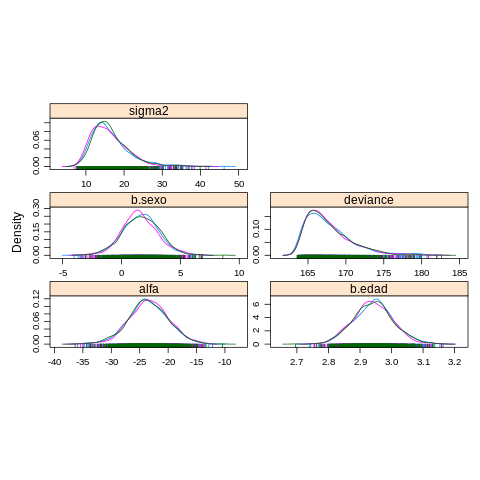

In [9]:
%%R

sale.mcmc = as.mcmc.list(sale$BUGSoutput)

xyplot(sale.mcmc)
densityplot(sale.mcmc)
